In [1]:
# coding: utf-8                                                                    
#                                                                                  
# Barabási–Albert Network Model                                                    
# by Aleksander Molak (2017)                                                       
# aleksander.molak@gmail.com                                                       
#                                                                                  
# ____________________________________________________________________             
# SECTION 1 - IMPORTS                                                              
                                                                                   
import networkx as nx                                                              
import numpy as np                                                                 
import random as rd                                                                
import matplotlib.pyplot as plt                                                    
import warnings   

In [2]:
# If you are using Jupyter Notebook you may find following two lines useful:       
# warnings.filterwarnings('ignore')                                                
# % matplotlib inline                                                              
                                                                                   
# ____________________________________________________________________             
# SECTION 2 - VISUALISATION FUNCTION                                               
                                                                                   
def k_distrib(graph, scale='lin', colour='#40a6d1', alpha=.8, expct_lo=1, expct_hi=10, expct_const=1):
    plt.close()                                                                    
    num_nodes = graph.number_of_nodes()                                            
    max_degree = 0                                                                 
    # Calculate the maximum degree to know the range of x-axis                     
    for n in graph.nodes():                                                        
        if graph.degree(n) > max_degree:                                           
            max_degree = graph.degree(n)                                           
    # X-axis and y-axis values                                                     
    x = []                                                                         
    y_tmp = []                                                                     
    # loop for all degrees until the maximum to compute the portion of nodes for that degree
    for i in range(max_degree+1):                                                  
        x.append(i)                                                                
        y_tmp.append(0)                                                            
        for n in graph.nodes():                                                    
            if graph.degree(n) == i:                                               
                y_tmp[i] += 1                                                      
        y = [i/num_nodes for i in y_tmp]                                           
    # Plot the graph                                                               
    deg, = plt.plot(x, y,label='Degree distribution',linewidth=0, marker='o',markersize=8, color=colour, alpha=alpha)
    # Check for the lin / log parameter and set axes scale                      
    if scale == 'log':                                                             
        plt.xscale('log')                                                          
        plt.yscale('log')                                                          
        plt.title('Degree distribution (log-log scale)')                           
        # add theoretical distribution line k^-3                                   
        w = [a for a in range(expct_lo,expct_hi)]                                  
        z = []                                                                     
        for i in w:                                                                
            x = (i**-3) * expct_const # set line's length and fit intercept        
            z.append(x)                                                            
                                                                                   
        plt.plot(w,z, 'k-', color='#7f7f7f')                                       
    else:                                                                          
        plt.title('Degree distribution (linear scale)')                            
                                                                                   
                                                                                   
    plt.ylabel('P(k)')                                                             
    plt.xlabel('k')                                                             
    plt.show()

In [3]:
# ____________________________________________________________________          
# SECTION 3 - BA ALGORITHM                                                      
                                                                                
print("***\nWelcome to Barabási–Albert (BA) model simulation\nAuthor: Aleksander Molak (2017)\n!איזה כיף\n\n")
                                                                                
# Get parameters                                                                
init_nodes = int(input("Please type in the initial number of nodes (m_0): "))   
final_nodes = int(input("\nPlease type in the final number of nodes: "))        
m_parameter = int(input("\nPlease type in the value of m parameter (m<=m_0): "))
                                                                                
print("\n")                                                                     
print("Creating initial graph...")                                              
                                                                                
#G = nx.complete_graph(init_nodes)                                               
G = nx.DiGraph()                                                                               
G.add_node(init_nodes)
G.add_edge(0, 1)
G.add_edge(1, 0)

print("Graph created. Number of nodes: {}".format(len(G.nodes())))              
print("Adding nodes...")                                                        
                                                                                
def rand_prob_node():                                                           
    nodes_probs = []                                                            
    for node in G.nodes():                                                      
        node_degr = G.in_degree(node) + G.out_degree(node)                                              
        #print(node_degr)                                                       
        node_proba = node_degr / (2 * len(G.edges()))                           
        #node_proba = node_degr / len(G.edges())
        #print("Node proba is: {}".format(node_proba))                          
        nodes_probs.append(node_proba)                                          
        #print("Nodes probablities: {}".format(nodes_probs))                    
    random_proba_node = np.random.choice(G.nodes(),p=nodes_probs)               
    #print("Randomly selected node is: {}".format(random_proba_node))           
    return random_proba_node                                                    
                                                                                
def add_edge():                                                                 
        if len(G.edges()) == 0:                                                 
            random_proba_node = 0                                               
        else:                                                                   
            random_proba_node = rand_prob_node()                                
        new_edge = (random_proba_node, new_node)                                
        if new_edge in G.edges():                                               
            print("!ככה לא בונים חומה")                                         
            add_edge()                                                          
        else:                                                                   
            print("!מזל טוב")                                                   
            G.add_edge(new_node, random_proba_node)                             
            print("Edge added: {} {}".format(new_node + 1, random_proba_node))  
                                                                                
count = 0                                                                       
new_node = init_nodes                                                           
                                                                                
for f in range(final_nodes - init_nodes):                                       
    print("----------> Step {} <----------".format(count))                      
    G.add_node(init_nodes + count)                                              
    print("Node added: {}".format(init_nodes + count + 1))                      
    count += 1                                                                  
    for e in range(0, m_parameter):                                             
        add_edge()                                                              
    new_node += 1                                                               
                                                                                
                                                                                
print("\nFinal number of nodes ({}) reached".format(len(G.nodes())))            
                                                                                
print("\n\nThanks! !תודה רבה :)\n")                                             


***
Welcome to Barabási–Albert (BA) model simulation
Author: Aleksander Molak (2017)
!איזה כיף


Please type in the initial number of nodes (m_0): 2

Please type in the final number of nodes: 100

Please type in the value of m parameter (m<=m_0): 2


Creating initial graph...
Graph created. Number of nodes: 3
Adding nodes...
----------> Step 0 <----------
Node added: 3
!מזל טוב
Edge added: 3 1
!מזל טוב
Edge added: 3 1
----------> Step 1 <----------
Node added: 4
!מזל טוב
Edge added: 4 1
!מזל טוב
Edge added: 4 1
----------> Step 2 <----------
Node added: 5
!מזל טוב
Edge added: 5 0
!מזל טוב
Edge added: 5 1
----------> Step 3 <----------
Node added: 6
!מזל טוב
Edge added: 6 2
!מזל טוב
Edge added: 6 3
----------> Step 4 <----------
Node added: 7
!מזל טוב
Edge added: 7 5
!מזל טוב
Edge added: 7 2
----------> Step 5 <----------
Node added: 8
!מזל טוב
Edge added: 8 1
!מזל טוב
Edge added: 8 4
----------> Step 6 <----------
Node added: 9
!מזל טוב
Edge added: 9 1
!מזל טוב
Edge added: 9 8
--------

Edge added: 92 74
!מזל טוב
Edge added: 92 85
----------> Step 90 <----------
Node added: 93
!מזל טוב
Edge added: 93 6
!מזל טוב
Edge added: 93 1
----------> Step 91 <----------
Node added: 94
!מזל טוב
Edge added: 94 2
!מזל טוב
Edge added: 94 34
----------> Step 92 <----------
Node added: 95
!מזל טוב
Edge added: 95 0
!מזל טוב
Edge added: 95 10
----------> Step 93 <----------
Node added: 96
!מזל טוב
Edge added: 96 30
!מזל טוב
Edge added: 96 92
----------> Step 94 <----------
Node added: 97
!מזל טוב
Edge added: 97 94
!מזל טוב
Edge added: 97 91
----------> Step 95 <----------
Node added: 98
!מזל טוב
Edge added: 98 74
!מזל טוב
Edge added: 98 56
----------> Step 96 <----------
Node added: 99
!מזל טוב
Edge added: 99 17
!מזל טוב
Edge added: 99 8
----------> Step 97 <----------
Node added: 100
!מזל טוב
Edge added: 100 4
!מזל טוב
Edge added: 100 9

Final number of nodes (100) reached


Thanks! !תודה רבה :)



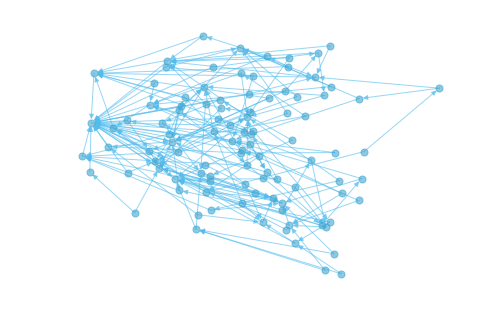

In [4]:
nx.draw(G, node_size=50, with_labels=0, alpha=0.6, node_color="#40a6d1", edge_color="#52bced")

In [5]:
np.random.choice(G.nodes())

98

In [50]:
np.random.choice(list(G[1]))

0

In [111]:
for i in range(10):
    for j in range(2):
        print(random_path(G, i))

[0]
[0]
[1]
[1]
[2, 1]
[2, 1]
[3, 1]
[3, 1]
[4, 0]
[4, 2, 1]
[5, 1]
[5, 1]
[6, 4, 2, 1]
[6, 4, 0]
[7, 0]
[7, 0]
[8, 1]
[8, 1]
[9, 4, 2, 1]
[9, 0]


In [72]:
x = [3,2,1]
y = [4,2,1]
[item for item in x if item not in y][0]

3

(array([ 940.,   16.,   13.,   17.,    5.,    0.,    1.,    2.,    2.,    4.]),
 array([ -1. ,   8.5,  18. ,  27.5,  37. ,  46.5,  56. ,  65.5,  75. ,
         84.5,  94. ]),
 <a list of 10 Patch objects>)

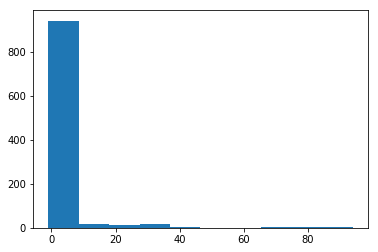

In [115]:
nodes = [two_path_mechanism(G) for i in range(1000)]
nodes
plt.hist(nodes)

In [138]:
import pandas as pd
df = pd.read_csv('citation-2000.csv', names=['uuid', 'patent_id', "citation_id", "date", "name", "kind", "country", "category", "sequence"])

dic = {}
edges = []
patent_graph = nx.DiGraph()
for idx, row in df[["patent_id", "citation_id"]].iterrows():
    #from_id = row["patent_id"]+""
    #to_id = row["citation_id"]+""
    #if from_id not in dic: dic[from_id] = len(dic)
    #if to_id   not in dic: dic[to_id] = len(dic)
        
    patent_graph.add_edge(from_id, to_id)
    #edges.append((from_id, to_id))

#nx.draw(patent_graph, node_size=50, with_labels=0, alpha=0.6, node_color="#40a6d1", edge_color="#52bced")
#k_distrib(patent_graph)

KeyboardInterrupt: 

In [73]:
def load_patent_graph(filename='citation-2000-1k.csv', reverse=False):
    df = pd.read_csv(filename, names=['uuid', 'patent_id', "citation_id", "date", "name", "kind", "country", "category", "sequence"])

    dic = {}
    edges = []
    patent_graph = nx.DiGraph()
    i = 0
    for idx, row in df[["patent_id", "citation_id"]].iterrows():
        #from_id = row["patent_id"]
        #to_id = row["citation_id"]
#         if from_id not in dic: dic[from_id] = len(dic)
#         if to_id   not in dic: dic[to_id] = len(dic)
        if not reverse:
            patent_graph.add_edge(row["patent_id"], row["citation_id"])
        else:
            patent_graph.add_edge(row["citation_id"], row["patent_id"])
        i += 1
        if i % 10000 == 0: print("Processsing %d" % i)
    
    return patent_graph

#citation_2000 = load_patent_graph('citation-2000.csv')

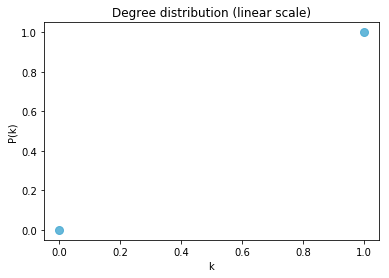

In [156]:
k_distrib(citation_2000)

In [162]:
citation_2000_1k = load_patent_graph()

Processsing 100
Processsing 200
Processsing 300
Processsing 400
Processsing 500
Processsing 600
Processsing 700
Processsing 800
Processsing 900
Processsing 1000


In [166]:
citation_2000_1k.nodes()

NodeView(('8626409', '6053833', '8882163', '6017067', '7102217', '6122171', '7570865', '6028690', '6481646', '6047907', '8493564', '6110106', 'D484060', 'D434323', 'D737568', 'D418972', '8888684', '6142956', '9495338', '6026452', '7991576', '6081230', 'D575335', 'D423048', '9518366', '6139220', '7999850', '6057882', '8123263', '6106039', '7246882', '6019461', 'D720698', '6095827', '7759062', '6045996', '6496365', '6049450', '8949980', '6026368', '8156124', '6154728', '7084615', '6043724', '7176566', '6021499', '8711854', '6031818', '6767284', '6019374', '7415478', '6167407', '9275786', '6031445', '6830618', '6039812', 'D474766', '6085177', '7712138', '6154844', '7069404', '6034889', '6580997', '6124807', '6583958', '6129981', '7351458', '6017412', '8747656', '6159358', '6389291', '6133873', '6883040', '6052442', '8497368', '6087374', '8547756', '6166407', '9530796', '6153912', '9217906', '6130774', '7435250', '6129726', '8819486', '6014669', '9418689', '6094020', '8514716', '6154446', 

In [167]:
citation_2000 = load_patent_graph('citation-2000.csv')

Processsing 10000
Processsing 20000
Processsing 30000
Processsing 40000
Processsing 50000
Processsing 60000
Processsing 70000
Processsing 80000
Processsing 90000
Processsing 100000
Processsing 110000
Processsing 120000
Processsing 130000
Processsing 140000
Processsing 150000
Processsing 160000
Processsing 170000
Processsing 180000
Processsing 190000
Processsing 200000
Processsing 210000
Processsing 220000
Processsing 230000
Processsing 240000
Processsing 250000
Processsing 260000
Processsing 270000
Processsing 280000
Processsing 290000
Processsing 300000
Processsing 310000
Processsing 320000
Processsing 330000
Processsing 340000
Processsing 350000
Processsing 360000
Processsing 370000
Processsing 380000
Processsing 390000
Processsing 400000
Processsing 410000
Processsing 420000
Processsing 430000
Processsing 440000
Processsing 450000
Processsing 460000
Processsing 470000
Processsing 480000
Processsing 490000
Processsing 500000
Processsing 510000
Processsing 520000
Processsing 530000
Pr

In [169]:
k_distrib(citation_2000)

KeyboardInterrupt: 

In [168]:
nodes = [two_path_mechanism(citation_2000_1k) for i in range(10)]


TypeError: '>=' not supported between instances of 'numpy.str_' and 'int'

In [ ]:
def stsm(G, db):
    u = set()
    while len(u) != len(G.nodes()):
        x = np.random.choice(list(G.nodes()))
        px = random_path(G, x)
        sx = set(px)
        y = np.random.choice(list(G.nodes()))
        py = random_path(G, y)
        sy = set(py)
        if len(sx & sy) == 0:
            u |= sx | sy
        else:
            z = [item for item in px if item in py][0]
            if z in u:
                return -1
            else:
                return z

(array([ 1000.,     0.,     0.,     0.,     0.,   972.,     0.,     0.,
            0.,    14.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

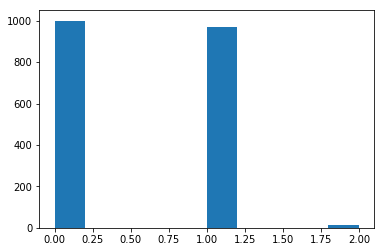

In [174]:
dist_1k = [citation_2000_1k.in_degree(node) for node in citation_2000_1k.nodes()]
plt.hist(dist_1k)

(array([ 1000.,     0.,     0.,     0.,     0.,   972.,     0.,     0.,
            0.,    14.]),
 array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ]),
 <a list of 10 Patch objects>)

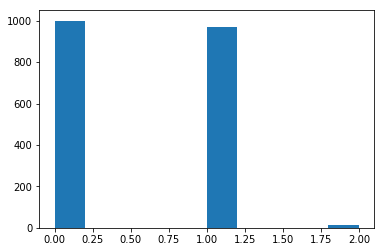

In [176]:
dist = [citation_2000.in_degree(node) for node in citation_2000.nodes()]

(array([  1.62486500e+06,   2.40700000e+03,   4.85000000e+02,
          1.70000000e+02,   6.10000000e+01,   2.80000000e+01,
          9.00000000e+00,   4.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0. ,   164.3,   328.6,   492.9,   657.2,   821.5,   985.8,
         1150.1,  1314.4,  1478.7,  1643. ]),
 <a list of 10 Patch objects>)

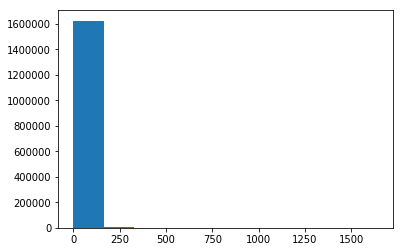

In [177]:
plt.hist(dist)

In [196]:
nodes = [two_path_mechanism(citation_2000) for i in range(10)]
nodes

KeyboardInterrupt: 

In [197]:
import pandas as pd
df = pd.read_csv('citation-2000.csv', names=['uuid', 'patent_id', "citation_id", "date", "name", "kind", "country", "category", "sequence"])

In [198]:
df

,uuid,patent_id,citation_id,date,name,kind,country,category,sequence
0,0000g2xnrngg946ymn9qlvhll,8626409,6053833,2000-04-01,Masaki,A,US,cited by applicant,199
1,0000h6loev0w0xt4e69qeru5v,8882163,6017067,2000-01-01,Yoneyama et al.,A,US,cited by examiner,3
2,00015gesha3xeij57s65ppmwy,7102217,6122171,2000-09-01,Akram et al.,A,US,cited by examiner,14
3,0001lnbi2ryn3scxr85vsvrcj,7570865,6028690,2000-02-01,Carter et al.,A,US,cited by other,165
4,0002ewiv10gll16z3h7r06rwe,6481646,6047907,2000-04-01,Hornby,A,US,cited by other,54
5,0002i8du90p0allcg92w4knah,8493564,6110106,2000-08-01,MacKinnon et al.,A,US,cited by applicant,77
6,0002o68wc5pc4xyrby2i5y0ob,D484060,D434323,2000-11-01,Pattison,S,US,cited by examiner,3
7,0002urnq5n9hjeedguoem8bca,D737568,D418972,2000-01-01,Gold,S,US,cited by applicant,12
8,00030tsy70bdbe1vtlms80ww9,8888684,6142956,2000-11-01,Kortenbach et al.,A,US,cited by applicant,360
9,00034985j0r02yimq8wt4wq6z,9495338,6026452,2000-02-01,Pitts,A,US,cited by applicant,17


In [226]:
argmax = None
max_indegree = 0
i = 0
for node in citation_2000.nodes():
    in_degree = citation_2000.in_degree(node)
    if in_degree > max_indegree:
        argmax = node
        max_indegree = in_degree
    i += 1
    if i % 1000 == 0: print("Processsing %d" % i)
print(node, in_degree)

Processsing 100
Processsing 200
Processsing 300
Processsing 400
Processsing 500
Processsing 600
Processsing 700
Processsing 800
Processsing 900
Processsing 1000
Processsing 1100
Processsing 1200
Processsing 1300
Processsing 1400
Processsing 1500
Processsing 1600
Processsing 1700
Processsing 1800
Processsing 1900
Processsing 2000
Processsing 2100
Processsing 2200
Processsing 2300
Processsing 2400
Processsing 2500
Processsing 2600
Processsing 2700
Processsing 2800
Processsing 2900
Processsing 3000
Processsing 3100
Processsing 3200
Processsing 3300
Processsing 3400
Processsing 3500
Processsing 3600
Processsing 3700
Processsing 3800
Processsing 3900
Processsing 4000
Processsing 4100
Processsing 4200
Processsing 4300
Processsing 4400
Processsing 4500
Processsing 4600
Processsing 4700
Processsing 4800
Processsing 4900
Processsing 5000
Processsing 5100
Processsing 5200
Processsing 5300
Processsing 5400
Processsing 5500
Processsing 5600
Processsing 5700
Processsing 5800
Processsing 5900
Proces

Processsing 54700
Processsing 54800
Processsing 54900
Processsing 55000
Processsing 55100
Processsing 55200
Processsing 55300
Processsing 55400
Processsing 55500
Processsing 55600
Processsing 55700
Processsing 55800
Processsing 55900
Processsing 56000
Processsing 56100
Processsing 56200
Processsing 56300
Processsing 56400
Processsing 56500
Processsing 56600
Processsing 56700
Processsing 56800
Processsing 56900
Processsing 57000
Processsing 57100
Processsing 57200
Processsing 57300
Processsing 57400
Processsing 57500
Processsing 57600
Processsing 57700
Processsing 57800
Processsing 57900
Processsing 58000
Processsing 58100
Processsing 58200
Processsing 58300
Processsing 58400
Processsing 58500
Processsing 58600
Processsing 58700
Processsing 58800
Processsing 58900
Processsing 59000
Processsing 59100
Processsing 59200
Processsing 59300
Processsing 59400
Processsing 59500
Processsing 59600
Processsing 59700
Processsing 59800
Processsing 59900
Processsing 60000
Processsing 60100
Processsin

Processsing 114100
Processsing 114200
Processsing 114300
Processsing 114400
Processsing 114500
Processsing 114600
Processsing 114700
Processsing 114800
Processsing 114900
Processsing 115000
Processsing 115100
Processsing 115200
Processsing 115300
Processsing 115400
Processsing 115500
Processsing 115600
Processsing 115700
Processsing 115800
Processsing 115900
Processsing 116000
Processsing 116100
Processsing 116200
Processsing 116300
Processsing 116400
Processsing 116500
Processsing 116600
Processsing 116700
Processsing 116800
Processsing 116900
Processsing 117000
Processsing 117100
Processsing 117200
Processsing 117300
Processsing 117400
Processsing 117500
Processsing 117600
Processsing 117700
Processsing 117800
Processsing 117900
Processsing 118000
Processsing 118100
Processsing 118200
Processsing 118300
Processsing 118400
Processsing 118500
Processsing 118600
Processsing 118700
Processsing 118800
Processsing 118900
Processsing 119000
Processsing 119100
Processsing 119200
Processsing 

Processsing 188100
Processsing 188200
Processsing 188300
Processsing 188400
Processsing 188500
Processsing 188600
Processsing 188700
Processsing 188800
Processsing 188900
Processsing 189000
Processsing 189100
Processsing 189200
Processsing 189300
Processsing 189400
Processsing 189500
Processsing 189600
Processsing 189700
Processsing 189800
Processsing 189900
Processsing 190000
Processsing 190100
Processsing 190200
Processsing 190300
Processsing 190400
Processsing 190500
Processsing 190600
Processsing 190700
Processsing 190800
Processsing 190900
Processsing 191000
Processsing 191100
Processsing 191200
Processsing 191300
Processsing 191400
Processsing 191500
Processsing 191600
Processsing 191700
Processsing 191800
Processsing 191900
Processsing 192000
Processsing 192100
Processsing 192200
Processsing 192300
Processsing 192400
Processsing 192500
Processsing 192600
Processsing 192700
Processsing 192800
Processsing 192900
Processsing 193000
Processsing 193100
Processsing 193200
Processsing 

Processsing 257700
Processsing 257800
Processsing 257900
Processsing 258000
Processsing 258100
Processsing 258200
Processsing 258300
Processsing 258400
Processsing 258500
Processsing 258600
Processsing 258700
Processsing 258800
Processsing 258900
Processsing 259000
Processsing 259100
Processsing 259200
Processsing 259300
Processsing 259400
Processsing 259500
Processsing 259600
Processsing 259700
Processsing 259800
Processsing 259900
Processsing 260000
Processsing 260100
Processsing 260200
Processsing 260300
Processsing 260400
Processsing 260500
Processsing 260600
Processsing 260700
Processsing 260800
Processsing 260900
Processsing 261000
Processsing 261100
Processsing 261200
Processsing 261300
Processsing 261400
Processsing 261500
Processsing 261600
Processsing 261700
Processsing 261800
Processsing 261900
Processsing 262000
Processsing 262100
Processsing 262200
Processsing 262300
Processsing 262400
Processsing 262500
Processsing 262600
Processsing 262700
Processsing 262800
Processsing 

Processsing 328700
Processsing 328800
Processsing 328900
Processsing 329000
Processsing 329100
Processsing 329200
Processsing 329300
Processsing 329400
Processsing 329500
Processsing 329600
Processsing 329700
Processsing 329800
Processsing 329900
Processsing 330000
Processsing 330100
Processsing 330200
Processsing 330300
Processsing 330400
Processsing 330500
Processsing 330600
Processsing 330700
Processsing 330800
Processsing 330900
Processsing 331000
Processsing 331100
Processsing 331200
Processsing 331300
Processsing 331400
Processsing 331500
Processsing 331600
Processsing 331700
Processsing 331800
Processsing 331900
Processsing 332000
Processsing 332100
Processsing 332200
Processsing 332300
Processsing 332400
Processsing 332500
Processsing 332600
Processsing 332700
Processsing 332800
Processsing 332900
Processsing 333000
Processsing 333100
Processsing 333200
Processsing 333300
Processsing 333400
Processsing 333500
Processsing 333600
Processsing 333700
Processsing 333800
Processsing 

Processsing 380900
Processsing 381000
Processsing 381100
Processsing 381200
Processsing 381300
Processsing 381400
Processsing 381500
Processsing 381600
Processsing 381700
Processsing 381800
Processsing 381900
Processsing 382000
Processsing 382100
Processsing 382200
Processsing 382300
Processsing 382400
Processsing 382500
Processsing 382600
Processsing 382700
Processsing 382800
Processsing 382900
Processsing 383000
Processsing 383100
Processsing 383200
Processsing 383300
Processsing 383400
Processsing 383500
Processsing 383600
Processsing 383700
Processsing 383800
Processsing 383900
Processsing 384000
Processsing 384100
Processsing 384200
Processsing 384300
Processsing 384400
Processsing 384500
Processsing 384600
Processsing 384700
Processsing 384800
Processsing 384900
Processsing 385000
Processsing 385100
Processsing 385200
Processsing 385300
Processsing 385400
Processsing 385500
Processsing 385600
Processsing 385700
Processsing 385800
Processsing 385900
Processsing 386000
Processsing 

Processsing 435000
Processsing 435100
Processsing 435200
Processsing 435300
Processsing 435400
Processsing 435500
Processsing 435600
Processsing 435700
Processsing 435800
Processsing 435900
Processsing 436000
Processsing 436100
Processsing 436200
Processsing 436300
Processsing 436400
Processsing 436500
Processsing 436600
Processsing 436700
Processsing 436800
Processsing 436900
Processsing 437000
Processsing 437100
Processsing 437200
Processsing 437300
Processsing 437400
Processsing 437500
Processsing 437600
Processsing 437700
Processsing 437800
Processsing 437900
Processsing 438000
Processsing 438100
Processsing 438200
Processsing 438300
Processsing 438400
Processsing 438500
Processsing 438600
Processsing 438700
Processsing 438800
Processsing 438900
Processsing 439000
Processsing 439100
Processsing 439200
Processsing 439300
Processsing 439400
Processsing 439500
Processsing 439600
Processsing 439700
Processsing 439800
Processsing 439900
Processsing 440000
Processsing 440100
Processsing 

Processsing 490200
Processsing 490300
Processsing 490400
Processsing 490500
Processsing 490600
Processsing 490700
Processsing 490800
Processsing 490900
Processsing 491000
Processsing 491100
Processsing 491200
Processsing 491300
Processsing 491400
Processsing 491500
Processsing 491600
Processsing 491700
Processsing 491800
Processsing 491900
Processsing 492000
Processsing 492100
Processsing 492200
Processsing 492300
Processsing 492400
Processsing 492500
Processsing 492600
Processsing 492700
Processsing 492800
Processsing 492900
Processsing 493000
Processsing 493100
Processsing 493200
Processsing 493300
Processsing 493400
Processsing 493500
Processsing 493600
Processsing 493700
Processsing 493800
Processsing 493900
Processsing 494000
Processsing 494100
Processsing 494200
Processsing 494300
Processsing 494400
Processsing 494500
Processsing 494600
Processsing 494700
Processsing 494800
Processsing 494900
Processsing 495000
Processsing 495100
Processsing 495200
Processsing 495300
Processsing 

Processsing 551500
Processsing 551600
Processsing 551700
Processsing 551800
Processsing 551900
Processsing 552000
Processsing 552100
Processsing 552200
Processsing 552300
Processsing 552400
Processsing 552500
Processsing 552600
Processsing 552700
Processsing 552800
Processsing 552900
Processsing 553000
Processsing 553100
Processsing 553200
Processsing 553300
Processsing 553400
Processsing 553500
Processsing 553600
Processsing 553700
Processsing 553800
Processsing 553900
Processsing 554000
Processsing 554100
Processsing 554200
Processsing 554300
Processsing 554400
Processsing 554500
Processsing 554600
Processsing 554700
Processsing 554800
Processsing 554900
Processsing 555000
Processsing 555100
Processsing 555200
Processsing 555300
Processsing 555400
Processsing 555500
Processsing 555600
Processsing 555700
Processsing 555800
Processsing 555900
Processsing 556000
Processsing 556100
Processsing 556200
Processsing 556300
Processsing 556400
Processsing 556500
Processsing 556600
Processsing 

Processsing 604700
Processsing 604800
Processsing 604900
Processsing 605000
Processsing 605100
Processsing 605200
Processsing 605300
Processsing 605400
Processsing 605500
Processsing 605600
Processsing 605700
Processsing 605800
Processsing 605900
Processsing 606000
Processsing 606100
Processsing 606200
Processsing 606300
Processsing 606400
Processsing 606500
Processsing 606600
Processsing 606700
Processsing 606800
Processsing 606900
Processsing 607000
Processsing 607100
Processsing 607200
Processsing 607300
Processsing 607400
Processsing 607500
Processsing 607600
Processsing 607700
Processsing 607800
Processsing 607900
Processsing 608000
Processsing 608100
Processsing 608200
Processsing 608300
Processsing 608400
Processsing 608500
Processsing 608600
Processsing 608700
Processsing 608800
Processsing 608900
Processsing 609000
Processsing 609100
Processsing 609200
Processsing 609300
Processsing 609400
Processsing 609500
Processsing 609600
Processsing 609700
Processsing 609800
Processsing 

Processsing 687700
Processsing 687800
Processsing 687900
Processsing 688000
Processsing 688100
Processsing 688200
Processsing 688300
Processsing 688400
Processsing 688500
Processsing 688600
Processsing 688700
Processsing 688800
Processsing 688900
Processsing 689000
Processsing 689100
Processsing 689200
Processsing 689300
Processsing 689400
Processsing 689500
Processsing 689600
Processsing 689700
Processsing 689800
Processsing 689900
Processsing 690000
Processsing 690100
Processsing 690200
Processsing 690300
Processsing 690400
Processsing 690500
Processsing 690600
Processsing 690700
Processsing 690800
Processsing 690900
Processsing 691000
Processsing 691100
Processsing 691200
Processsing 691300
Processsing 691400
Processsing 691500
Processsing 691600
Processsing 691700
Processsing 691800
Processsing 691900
Processsing 692000
Processsing 692100
Processsing 692200
Processsing 692300
Processsing 692400
Processsing 692500
Processsing 692600
Processsing 692700
Processsing 692800
Processsing 

Processsing 734900
Processsing 735000
Processsing 735100
Processsing 735200
Processsing 735300
Processsing 735400
Processsing 735500
Processsing 735600
Processsing 735700
Processsing 735800
Processsing 735900
Processsing 736000
Processsing 736100
Processsing 736200
Processsing 736300
Processsing 736400
Processsing 736500
Processsing 736600
Processsing 736700
Processsing 736800
Processsing 736900
Processsing 737000
Processsing 737100
Processsing 737200
Processsing 737300
Processsing 737400
Processsing 737500
Processsing 737600
Processsing 737700
Processsing 737800
Processsing 737900
Processsing 738000
Processsing 738100
Processsing 738200
Processsing 738300
Processsing 738400
Processsing 738500
Processsing 738600
Processsing 738700
Processsing 738800
Processsing 738900
Processsing 739000
Processsing 739100
Processsing 739200
Processsing 739300
Processsing 739400
Processsing 739500
Processsing 739600
Processsing 739700
Processsing 739800
Processsing 739900
Processsing 740000
Processsing 

Processsing 785000
Processsing 785100
Processsing 785200
Processsing 785300
Processsing 785400
Processsing 785500
Processsing 785600
Processsing 785700
Processsing 785800
Processsing 785900
Processsing 786000
Processsing 786100
Processsing 786200
Processsing 786300
Processsing 786400
Processsing 786500
Processsing 786600
Processsing 786700
Processsing 786800
Processsing 786900
Processsing 787000
Processsing 787100
Processsing 787200
Processsing 787300
Processsing 787400
Processsing 787500
Processsing 787600
Processsing 787700
Processsing 787800
Processsing 787900
Processsing 788000
Processsing 788100
Processsing 788200
Processsing 788300
Processsing 788400
Processsing 788500
Processsing 788600
Processsing 788700
Processsing 788800
Processsing 788900
Processsing 789000
Processsing 789100
Processsing 789200
Processsing 789300
Processsing 789400
Processsing 789500
Processsing 789600
Processsing 789700
Processsing 789800
Processsing 789900
Processsing 790000
Processsing 790100
Processsing 

Processsing 861300
Processsing 861400
Processsing 861500
Processsing 861600
Processsing 861700
Processsing 861800
Processsing 861900
Processsing 862000
Processsing 862100
Processsing 862200
Processsing 862300
Processsing 862400
Processsing 862500
Processsing 862600
Processsing 862700
Processsing 862800
Processsing 862900
Processsing 863000
Processsing 863100
Processsing 863200
Processsing 863300
Processsing 863400
Processsing 863500
Processsing 863600
Processsing 863700
Processsing 863800
Processsing 863900
Processsing 864000
Processsing 864100
Processsing 864200
Processsing 864300
Processsing 864400
Processsing 864500
Processsing 864600
Processsing 864700
Processsing 864800
Processsing 864900
Processsing 865000
Processsing 865100
Processsing 865200
Processsing 865300
Processsing 865400
Processsing 865500
Processsing 865600
Processsing 865700
Processsing 865800
Processsing 865900
Processsing 866000
Processsing 866100
Processsing 866200
Processsing 866300
Processsing 866400
Processsing 

Processsing 918500
Processsing 918600
Processsing 918700
Processsing 918800
Processsing 918900
Processsing 919000
Processsing 919100
Processsing 919200
Processsing 919300
Processsing 919400
Processsing 919500
Processsing 919600
Processsing 919700
Processsing 919800
Processsing 919900
Processsing 920000
Processsing 920100
Processsing 920200
Processsing 920300
Processsing 920400
Processsing 920500
Processsing 920600
Processsing 920700
Processsing 920800
Processsing 920900
Processsing 921000
Processsing 921100
Processsing 921200
Processsing 921300
Processsing 921400
Processsing 921500
Processsing 921600
Processsing 921700
Processsing 921800
Processsing 921900
Processsing 922000
Processsing 922100
Processsing 922200
Processsing 922300
Processsing 922400
Processsing 922500
Processsing 922600
Processsing 922700
Processsing 922800
Processsing 922900
Processsing 923000
Processsing 923100
Processsing 923200
Processsing 923300
Processsing 923400
Processsing 923500
Processsing 923600
Processsing 

Processsing 980900
Processsing 981000
Processsing 981100
Processsing 981200
Processsing 981300
Processsing 981400
Processsing 981500
Processsing 981600
Processsing 981700
Processsing 981800
Processsing 981900
Processsing 982000
Processsing 982100
Processsing 982200
Processsing 982300
Processsing 982400
Processsing 982500
Processsing 982600
Processsing 982700
Processsing 982800
Processsing 982900
Processsing 983000
Processsing 983100
Processsing 983200
Processsing 983300
Processsing 983400
Processsing 983500
Processsing 983600
Processsing 983700
Processsing 983800
Processsing 983900
Processsing 984000
Processsing 984100
Processsing 984200
Processsing 984300
Processsing 984400
Processsing 984500
Processsing 984600
Processsing 984700
Processsing 984800
Processsing 984900
Processsing 985000
Processsing 985100
Processsing 985200
Processsing 985300
Processsing 985400
Processsing 985500
Processsing 985600
Processsing 985700
Processsing 985800
Processsing 985900
Processsing 986000
Processsing 

Processsing 1038200
Processsing 1038300
Processsing 1038400
Processsing 1038500
Processsing 1038600
Processsing 1038700
Processsing 1038800
Processsing 1038900
Processsing 1039000
Processsing 1039100
Processsing 1039200
Processsing 1039300
Processsing 1039400
Processsing 1039500
Processsing 1039600
Processsing 1039700
Processsing 1039800
Processsing 1039900
Processsing 1040000
Processsing 1040100
Processsing 1040200
Processsing 1040300
Processsing 1040400
Processsing 1040500
Processsing 1040600
Processsing 1040700
Processsing 1040800
Processsing 1040900
Processsing 1041000
Processsing 1041100
Processsing 1041200
Processsing 1041300
Processsing 1041400
Processsing 1041500
Processsing 1041600
Processsing 1041700
Processsing 1041800
Processsing 1041900
Processsing 1042000
Processsing 1042100
Processsing 1042200
Processsing 1042300
Processsing 1042400
Processsing 1042500
Processsing 1042600
Processsing 1042700
Processsing 1042800
Processsing 1042900
Processsing 1043000
Processsing 1043100


Processsing 1117800
Processsing 1117900
Processsing 1118000
Processsing 1118100
Processsing 1118200
Processsing 1118300
Processsing 1118400
Processsing 1118500
Processsing 1118600
Processsing 1118700
Processsing 1118800
Processsing 1118900
Processsing 1119000
Processsing 1119100
Processsing 1119200
Processsing 1119300
Processsing 1119400
Processsing 1119500
Processsing 1119600
Processsing 1119700
Processsing 1119800
Processsing 1119900
Processsing 1120000
Processsing 1120100
Processsing 1120200
Processsing 1120300
Processsing 1120400
Processsing 1120500
Processsing 1120600
Processsing 1120700
Processsing 1120800
Processsing 1120900
Processsing 1121000
Processsing 1121100
Processsing 1121200
Processsing 1121300
Processsing 1121400
Processsing 1121500
Processsing 1121600
Processsing 1121700
Processsing 1121800
Processsing 1121900
Processsing 1122000
Processsing 1122100
Processsing 1122200
Processsing 1122300
Processsing 1122400
Processsing 1122500
Processsing 1122600
Processsing 1122700


Processsing 1172000
Processsing 1172100
Processsing 1172200
Processsing 1172300
Processsing 1172400
Processsing 1172500
Processsing 1172600
Processsing 1172700
Processsing 1172800
Processsing 1172900
Processsing 1173000
Processsing 1173100
Processsing 1173200
Processsing 1173300
Processsing 1173400
Processsing 1173500
Processsing 1173600
Processsing 1173700
Processsing 1173800
Processsing 1173900
Processsing 1174000
Processsing 1174100
Processsing 1174200
Processsing 1174300
Processsing 1174400
Processsing 1174500
Processsing 1174600
Processsing 1174700
Processsing 1174800
Processsing 1174900
Processsing 1175000
Processsing 1175100
Processsing 1175200
Processsing 1175300
Processsing 1175400
Processsing 1175500
Processsing 1175600
Processsing 1175700
Processsing 1175800
Processsing 1175900
Processsing 1176000
Processsing 1176100
Processsing 1176200
Processsing 1176300
Processsing 1176400
Processsing 1176500
Processsing 1176600
Processsing 1176700
Processsing 1176800
Processsing 1176900


Processsing 1218400
Processsing 1218500
Processsing 1218600
Processsing 1218700
Processsing 1218800
Processsing 1218900
Processsing 1219000
Processsing 1219100
Processsing 1219200
Processsing 1219300
Processsing 1219400
Processsing 1219500
Processsing 1219600
Processsing 1219700
Processsing 1219800
Processsing 1219900
Processsing 1220000
Processsing 1220100
Processsing 1220200
Processsing 1220300
Processsing 1220400
Processsing 1220500
Processsing 1220600
Processsing 1220700
Processsing 1220800
Processsing 1220900
Processsing 1221000
Processsing 1221100
Processsing 1221200
Processsing 1221300
Processsing 1221400
Processsing 1221500
Processsing 1221600
Processsing 1221700
Processsing 1221800
Processsing 1221900
Processsing 1222000
Processsing 1222100
Processsing 1222200
Processsing 1222300
Processsing 1222400
Processsing 1222500
Processsing 1222600
Processsing 1222700
Processsing 1222800
Processsing 1222900
Processsing 1223000
Processsing 1223100
Processsing 1223200
Processsing 1223300


Processsing 1278800
Processsing 1278900
Processsing 1279000
Processsing 1279100
Processsing 1279200
Processsing 1279300
Processsing 1279400
Processsing 1279500
Processsing 1279600
Processsing 1279700
Processsing 1279800
Processsing 1279900
Processsing 1280000
Processsing 1280100
Processsing 1280200
Processsing 1280300
Processsing 1280400
Processsing 1280500
Processsing 1280600
Processsing 1280700
Processsing 1280800
Processsing 1280900
Processsing 1281000
Processsing 1281100
Processsing 1281200
Processsing 1281300
Processsing 1281400
Processsing 1281500
Processsing 1281600
Processsing 1281700
Processsing 1281800
Processsing 1281900
Processsing 1282000
Processsing 1282100
Processsing 1282200
Processsing 1282300
Processsing 1282400
Processsing 1282500
Processsing 1282600
Processsing 1282700
Processsing 1282800
Processsing 1282900
Processsing 1283000
Processsing 1283100
Processsing 1283200
Processsing 1283300
Processsing 1283400
Processsing 1283500
Processsing 1283600
Processsing 1283700


Processsing 1329900
Processsing 1330000
Processsing 1330100
Processsing 1330200
Processsing 1330300
Processsing 1330400
Processsing 1330500
Processsing 1330600
Processsing 1330700
Processsing 1330800
Processsing 1330900
Processsing 1331000
Processsing 1331100
Processsing 1331200
Processsing 1331300
Processsing 1331400
Processsing 1331500
Processsing 1331600
Processsing 1331700
Processsing 1331800
Processsing 1331900
Processsing 1332000
Processsing 1332100
Processsing 1332200
Processsing 1332300
Processsing 1332400
Processsing 1332500
Processsing 1332600
Processsing 1332700
Processsing 1332800
Processsing 1332900
Processsing 1333000
Processsing 1333100
Processsing 1333200
Processsing 1333300
Processsing 1333400
Processsing 1333500
Processsing 1333600
Processsing 1333700
Processsing 1333800
Processsing 1333900
Processsing 1334000
Processsing 1334100
Processsing 1334200
Processsing 1334300
Processsing 1334400
Processsing 1334500
Processsing 1334600
Processsing 1334700
Processsing 1334800


Processsing 1391200
Processsing 1391300
Processsing 1391400
Processsing 1391500
Processsing 1391600
Processsing 1391700
Processsing 1391800
Processsing 1391900
Processsing 1392000
Processsing 1392100
Processsing 1392200
Processsing 1392300
Processsing 1392400
Processsing 1392500
Processsing 1392600
Processsing 1392700
Processsing 1392800
Processsing 1392900
Processsing 1393000
Processsing 1393100
Processsing 1393200
Processsing 1393300
Processsing 1393400
Processsing 1393500
Processsing 1393600
Processsing 1393700
Processsing 1393800
Processsing 1393900
Processsing 1394000
Processsing 1394100
Processsing 1394200
Processsing 1394300
Processsing 1394400
Processsing 1394500
Processsing 1394600
Processsing 1394700
Processsing 1394800
Processsing 1394900
Processsing 1395000
Processsing 1395100
Processsing 1395200
Processsing 1395300
Processsing 1395400
Processsing 1395500
Processsing 1395600
Processsing 1395700
Processsing 1395800
Processsing 1395900
Processsing 1396000
Processsing 1396100


Processsing 1463100
Processsing 1463200
Processsing 1463300
Processsing 1463400
Processsing 1463500
Processsing 1463600
Processsing 1463700
Processsing 1463800
Processsing 1463900
Processsing 1464000
Processsing 1464100
Processsing 1464200
Processsing 1464300
Processsing 1464400
Processsing 1464500
Processsing 1464600
Processsing 1464700
Processsing 1464800
Processsing 1464900
Processsing 1465000
Processsing 1465100
Processsing 1465200
Processsing 1465300
Processsing 1465400
Processsing 1465500
Processsing 1465600
Processsing 1465700
Processsing 1465800
Processsing 1465900
Processsing 1466000
Processsing 1466100
Processsing 1466200
Processsing 1466300
Processsing 1466400
Processsing 1466500
Processsing 1466600
Processsing 1466700
Processsing 1466800
Processsing 1466900
Processsing 1467000
Processsing 1467100
Processsing 1467200
Processsing 1467300
Processsing 1467400
Processsing 1467500
Processsing 1467600
Processsing 1467700
Processsing 1467800
Processsing 1467900
Processsing 1468000


Processsing 1538100
Processsing 1538200
Processsing 1538300
Processsing 1538400
Processsing 1538500
Processsing 1538600
Processsing 1538700
Processsing 1538800
Processsing 1538900
Processsing 1539000
Processsing 1539100
Processsing 1539200
Processsing 1539300
Processsing 1539400
Processsing 1539500
Processsing 1539600
Processsing 1539700
Processsing 1539800
Processsing 1539900
Processsing 1540000
Processsing 1540100
Processsing 1540200
Processsing 1540300
Processsing 1540400
Processsing 1540500
Processsing 1540600
Processsing 1540700
Processsing 1540800
Processsing 1540900
Processsing 1541000
Processsing 1541100
Processsing 1541200
Processsing 1541300
Processsing 1541400
Processsing 1541500
Processsing 1541600
Processsing 1541700
Processsing 1541800
Processsing 1541900
Processsing 1542000
Processsing 1542100
Processsing 1542200
Processsing 1542300
Processsing 1542400
Processsing 1542500
Processsing 1542600
Processsing 1542700
Processsing 1542800
Processsing 1542900
Processsing 1543000


In [74]:
citation_2000_1k_r = load_patent_graph(reverse=True)

In [207]:
strong_component(citation_2000_1k_r, "6053833")

['8626409']

In [228]:
def get_biggest_node(graph):
    argmax = None
    max_indegree = 0
    i = 0
    for node in graph.nodes():
        in_degree = len(graph[node])
        if in_degree > max_indegree:
            argmax = node
            max_indegree = in_degree
        i += 1
        if i % 1000 == 0: print("Processsing %d" % i)
    return (argmax, max_indegree)
print(get_biggest_node(citation_2000_1k_r))

Processsing 1000
('6094020', 2)


In [218]:
strong_component(citation_2000_1k_r, "6094020")

9418689
9058826


['9418689', '9058826']

In [221]:
citation_2000_r = load_patent_graph("citation-2000.csv", reverse=True)

Processsing 10000
Processsing 20000
Processsing 30000
Processsing 40000
Processsing 50000
Processsing 60000
Processsing 70000
Processsing 80000
Processsing 90000
Processsing 100000
Processsing 110000
Processsing 120000
Processsing 130000
Processsing 140000
Processsing 150000
Processsing 160000
Processsing 170000
Processsing 180000
Processsing 190000
Processsing 200000
Processsing 210000
Processsing 220000
Processsing 230000
Processsing 240000
Processsing 250000
Processsing 260000
Processsing 270000
Processsing 280000
Processsing 290000
Processsing 300000
Processsing 310000
Processsing 320000
Processsing 330000
Processsing 340000
Processsing 350000
Processsing 360000
Processsing 370000
Processsing 380000
Processsing 390000
Processsing 400000
Processsing 410000
Processsing 420000
Processsing 430000
Processsing 440000
Processsing 450000
Processsing 460000
Processsing 470000
Processsing 480000
Processsing 490000
Processsing 500000
Processsing 510000
Processsing 520000
Processsing 530000
Pr

In [223]:
def reverese(graph):
    rg = nx.DiGraph()
    for f, t in graph.edges():
        rg.add_edge(t, f)
    return rg

In [224]:
def reward():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-224-fb76061e6d06>, line 2)

In [229]:
print(get_biggest_node(citation_2000_r))

Processsing 1000
Processsing 2000
Processsing 3000
Processsing 4000
Processsing 5000
Processsing 6000
Processsing 7000
Processsing 8000
Processsing 9000
Processsing 10000
Processsing 11000
Processsing 12000
Processsing 13000
Processsing 14000
Processsing 15000
Processsing 16000
Processsing 17000
Processsing 18000
Processsing 19000
Processsing 20000
Processsing 21000
Processsing 22000
Processsing 23000
Processsing 24000
Processsing 25000
Processsing 26000
Processsing 27000
Processsing 28000
Processsing 29000
Processsing 30000
Processsing 31000
Processsing 32000
Processsing 33000
Processsing 34000
Processsing 35000
Processsing 36000
Processsing 37000
Processsing 38000
Processsing 39000
Processsing 40000
Processsing 41000
Processsing 42000
Processsing 43000
Processsing 44000
Processsing 45000
Processsing 46000
Processsing 47000
Processsing 48000
Processsing 49000
Processsing 50000
Processsing 51000
Processsing 52000
Processsing 53000
Processsing 54000
Processsing 55000
Processsing 56000
P

Processsing 885000
Processsing 886000
Processsing 887000
Processsing 888000
Processsing 889000
Processsing 890000
Processsing 891000
Processsing 892000
Processsing 893000
Processsing 894000
Processsing 895000
Processsing 896000
Processsing 897000
Processsing 898000
Processsing 899000
Processsing 900000
Processsing 901000
Processsing 902000
Processsing 903000
Processsing 904000
Processsing 905000
Processsing 906000
Processsing 907000
Processsing 908000
Processsing 909000
Processsing 910000
Processsing 911000
Processsing 912000
Processsing 913000
Processsing 914000
Processsing 915000
Processsing 916000
Processsing 917000
Processsing 918000
Processsing 919000
Processsing 920000
Processsing 921000
Processsing 922000
Processsing 923000
Processsing 924000
Processsing 925000
Processsing 926000
Processsing 927000
Processsing 928000
Processsing 929000
Processsing 930000
Processsing 931000
Processsing 932000
Processsing 933000
Processsing 934000
Processsing 935000
Processsing 936000
Processsing 

Processsing 1351000
Processsing 1352000
Processsing 1353000
Processsing 1354000
Processsing 1355000
Processsing 1356000
Processsing 1357000
Processsing 1358000
Processsing 1359000
Processsing 1360000
Processsing 1361000
Processsing 1362000
Processsing 1363000
Processsing 1364000
Processsing 1365000
Processsing 1366000
Processsing 1367000
Processsing 1368000
Processsing 1369000
Processsing 1370000
Processsing 1371000
Processsing 1372000
Processsing 1373000
Processsing 1374000
Processsing 1375000
Processsing 1376000
Processsing 1377000
Processsing 1378000
Processsing 1379000
Processsing 1380000
Processsing 1381000
Processsing 1382000
Processsing 1383000
Processsing 1384000
Processsing 1385000
Processsing 1386000
Processsing 1387000
Processsing 1388000
Processsing 1389000
Processsing 1390000
Processsing 1391000
Processsing 1392000
Processsing 1393000
Processsing 1394000
Processsing 1395000
Processsing 1396000
Processsing 1397000
Processsing 1398000
Processsing 1399000
Processsing 1400000


In [230]:
sc = strong_component(citation_2000_r, "6029195")

1761

In [234]:
[item for item in x if item not in y][0]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [129]:
def strong_component(graph, seed, n=10000, mem=None):
    if mem is None: mem = []
            
    for node in graph[seed]:
        if len(mem) >= n: break
        mem.append(node)
        strong_component(graph, node, n, mem)
        
    return mem

def strong_components(graph):
    scs = []
    queue = list(graph.nodes())
    max_sc = None
    max_sc_size = 0
    while len(queue) > 0:
        sc = strong_component(graph, queue[0])
        del queue[0]
        queue = [item for item in queue if item not in sc]
        scs.append(sc)
        if len(sc) > max_sc_size:
            max_sc = sc
            max_sc_size = len(sc)
    return (scs, max_sc)

In [ ]:
scs, max = strong_components(citation_2000_r)
len(max)

In [269]:
agents = gen_agents_from(citation_2000_1k)
for node in agents:
    print(agents[node].randomness)

0.10100653050991815
0.9432257620380199
0.13430925473656974
0.9260021488849676
0.6173356039974179
0.9068925840664269
0.2949300036610091
0.9168148269902251
0.41912769114646253
0.8664758749626197
0.22911971806217157
0.425072011525638
0.5665172852733893
0.8153191303332165
0.722726093965413
0.11530946097253558
0.16568255654836306
0.23960424683022152
0.8796915718068199
0.14759875873132688
0.5475432256268955
0.172791975090565
0.5991989460934511
0.6285928286876473
0.4524343030499618
0.1750188735795375
0.5154068640633674
0.6022893235204059
0.3920159056961926
0.5267193605084441
0.11486284828193116
0.06014890300470621
0.12022612700254609
0.5182611696842641
0.39497020566512175
0.2983758301961842
0.027385144344853285
0.637547388238448
0.31357049388585034
0.8164763976527115
0.9145567067888156
0.4648609453917313
0.12343281067946554
0.8563659064267006
0.24131032815270415
0.135192982944504
0.4341819973324762
0.6873923864668832
0.9532756993392446
0.15791876943783278
0.2560029222532868
0.291241790749487


# ST2P Mechanism

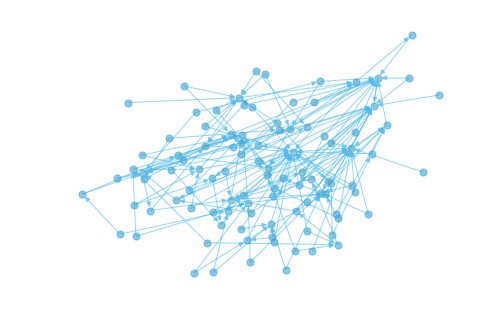

In [292]:
nx.draw(G, node_size=50, with_labels=0, alpha=0.6, node_color="#40a6d1", edge_color="#52bced")

In [151]:
def random_path(G, start_at, max_count=100, log=None, agents=None):
    node = start_at
    path = [node]
#     while node >= terminate_nodes:
    for i in range(max_count):
        prev = node
        if agents is None:
            to = G[node]
            if len(to) == 0: break
            node = np.random.choice(list(to))
        else:
            node = agents[node].next();
            if node is None: break
        path.append(node)
        
        #if log is not None:
        #    log.append( (prev, node, 1, agents[node].validate(prev)) )
    return path

def two_path_mechanism(G, log=None, agents=None):
    u = set()
    while len(u) != len(G.nodes()):
        x = np.random.choice(list(G.nodes()))
        px = random_path(G, x, log=log, agents=agents)
        sx = set(px)
        y = np.random.choice(list(G.nodes()))
        py = random_path(G, y, log=log, agents=agents)
        sy = set(py)
        if len(sx & sy) == 0:
            u |= sx | sy
        else:
            z = [item for item in px if item in py][0]
            if z in u:
                return -1
            else:
                return z

def make_log_from(graph, agents, log=None):
    if log is None: log = []
    for frm in graph.nodes():
        a = 0
        for to, r in agents[frm].report_out:
            """
            a += r
            if r == 1 or ( r == 0 and a > 0 ): 
                r2 = agents[to].validate(frm)
                log.append( (frm, to, r, r2) )
                if r == 0 : a -= 2
            r2 = agents[to].validate(frm)
            log.append( (frm, to, r, r2) )
            """
            
            r2 = agents[to].validate(frm)
            log.append( (frm, to, r, r2) )
            
            #if r2 + r > 0 :
            #    log.append( (frm, to, r, r2) ) 
            
    return log
            
def H(x, y):
    return x*y + (1-x)*(1-y)
                   
def rewards(log):
    reward = {}
    h = {} # empilical probability
    pos_cases = {} 
    all_cases = {} 
    for prev, node, r_prev, r_node in log:
        if prev not in reward: reward[prev] = 0.
        if node not in reward: reward[node] = 0.
        if prev not in pos_cases: pos_cases[prev] = 0.
        if node not in pos_cases: pos_cases[node] = 0.
        if prev not in all_cases: all_cases[prev] = 0.
        if node not in all_cases: all_cases[node] = 0.
        
        pos_cases[prev] += r_prev
        pos_cases[node] += r_node
        all_cases[prev] += 1.
        all_cases[node] += 1.
                   
    for node in all_cases:
        h[node] = pos_cases[node] / all_cases[node]
                   
    for prev, node, r_prev, r_node in log:
        delta = H(r_prev, r_node) - H(h[prev], h[node])
        reward[prev] += delta
        reward[node] += delta
                   
    return reward

In [120]:
# An agent knows his number and whole graph structure
class Agent:
    def __init__(self, graph, node, randomness=0):
        self.graph = graph
        self.node = node
        self.randomness = randomness
        self.report_out, self.report_out_edges = self.report_edges()
        #self.report_in,  self.report_in_edges  = self.report_edegs( in_edges = True )
    
    def next(self):
        if len( self.report_out_edges ) == 0:
            return None
        else:
            return np.random.choice( self.report_out_edges )
        
        """
        true_neighbor = list(self.graph[self.node])
        
        if np.random.rand() >= self.randomness:
            # Return true edge
            if len(true_neighbor) == 0:
                return None
            else:
                return np.random.choice(true_neighbor)
        else:
            # Return randomly chosen node
            return np.random.choice(self.graph.nodes())
            
            # 論点: 自分より少ない番号のエッジを指さないと DAG にならない？
        """
    
    
    def report_edges( self, in_edges=False ):
        reports = []
        edges = []
        for v in self.graph.nodes():  # iterate all the nodes
            if v != self.node:
                r = self.has_edge( v, self.node ) if in_edges else self.has_edge( self.node, v )
                reports.append( (v, r) )
                if r == 1:  edges.append( v )
        return reports, edges

    def has_edge( self, frm, to ):
        if np.random.rand() >= self.randomness:
            return 1 if self.graph.has_edge( frm, to ) else 0
        else:
            return 1 if np.random.rand() >= 0.5 else 0
    
    def validate( self, frm ):
        # deprecate
        if np.random.rand() >= self.randomness:
            return 1 if self.graph.has_edge( frm, self.node ) else 0
        else:
            return 1 if np.random.rand() >= 0.5 else 0
        #return 1 if self.graph.has_edge( frm, self.node ) else 0

In [121]:
def gen_agents_from(graph, randomness_min=0., randomness_max=1.):
    agents = {}
    for node in list(graph.nodes()):
        randomness = np.random.rand() * (randomness_max - randomness_min) + randomness_min
        randomness = int(randomness * 10)/10
        agents[node] = Agent(graph, node, randomness)
    return agents

In [122]:
agents = gen_agents_from(G, randomness_min=0, randomness_max=1)

(array([ 14.,  10.,  12.,  12.,   5.,  10.,   8.,  14.,   7.,   8.]),
 array([  0. ,   9.9,  19.8,  29.7,  39.6,  49.5,  59.4,  69.3,  79.2,
         89.1,  99. ]),
 <a list of 10 Patch objects>)

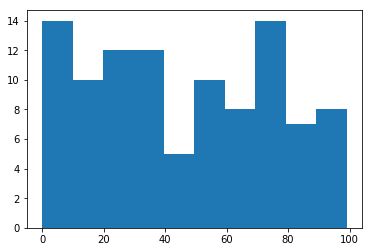

In [123]:
log = []
nodes = [two_path_mechanism(G, log=log, agents=agents) for i in range(100)]
plt.hist( nodes )

In [124]:
log = make_log_from(G, agents)

In [125]:
rwd = rewards(log)

In [126]:
stat = []
for i in range(10):
    stat.append([])
    
for node in agents:
    category = int( agents[node].randomness * 10 )
    stat[category].append( rwd[node] )

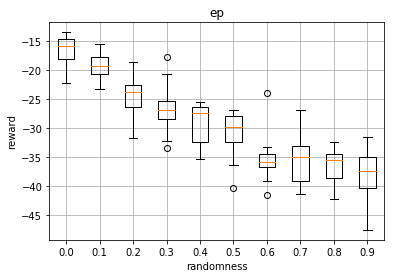

In [127]:
# 点数のタプル
# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(stat)
ax.set_xticklabels([x/10 for x in range(10)])

plt.title('ep')
plt.xlabel('randomness')
plt.ylabel('reward')
# Y軸のメモリのrange
plt.grid()

# 描画
plt.show()

In [70]:
import pandas as pd
df13 = pd.read_csv('citation-2013-2017.csv', names=['uuid', 'patent_id', "citation_id", "date", "name", "kind", "country", "category", "sequence"])

In [71]:
df13

,uuid,patent_id,citation_id,date,name,kind,country,category,sequence
0,00000oohcwply47niwhm5i42l,D786922,D718330,2014-11-01,Shin,S,US,cited by examiner,11
1,00015y3rjl127wnwvrzcuymi9,9699702,8693438,2014-04-01,Takahashi et al.,B2,US,cited by applicant,0
2,0002b1m9c483y011jhhcyq6xy,9550247,8366904,2013-02-01,Whitmore,B2,US,cited by applicant,15
3,0002tfjniqpkvxfe2aevrjjw0,9572775,8518376,2013-08-01,Tamarkin et al.,B2,US,cited by applicant,626
4,00037rpxz6ay9unk6dkoz6gce,9102800,8785591,2014-07-01,Allen et al.,B2,US,cited by applicant,12
5,00042iqp25wtfmhv8te29hs2p,9590213,9231030,2016-01-01,Choi,B2,US,cited by examiner,13
6,0005gh6n7eekimtqqsjnuv0i5,9503519,8385267,2013-02-01,Wu,B2,US,cited by examiner,1
7,0006vkb7pcp3w7eostt99gzs7,D775921,D700821,2014-03-01,Tschopp,S,US,cited by examiner,11
8,0007j2e90gp3c8ldxl8css6wm,D736031,D707834,2014-06-01,Hotchi et al.,S,US,cited by examiner,45
9,00081vyh2w2abrz88shgjvyf4,9638265,8360221,2013-01-01,Neubauer et al.,B2,US,cited by applicant,2


In [75]:
citation_2013_r = load_patent_graph("citation-2013-2017.csv", reverse=True)

Processsing 10000
Processsing 20000
Processsing 30000
Processsing 40000
Processsing 50000
Processsing 60000
Processsing 70000
Processsing 80000
Processsing 90000
Processsing 100000
Processsing 110000
Processsing 120000
Processsing 130000
Processsing 140000
Processsing 150000
Processsing 160000
Processsing 170000
Processsing 180000
Processsing 190000
Processsing 200000
Processsing 210000
Processsing 220000
Processsing 230000
Processsing 240000
Processsing 250000
Processsing 260000
Processsing 270000
Processsing 280000
Processsing 290000
Processsing 300000
Processsing 310000
Processsing 320000
Processsing 330000
Processsing 340000
Processsing 350000
Processsing 360000
Processsing 370000
Processsing 380000
Processsing 390000
Processsing 400000
Processsing 410000
Processsing 420000
Processsing 430000
Processsing 440000
Processsing 450000
Processsing 460000
Processsing 470000
Processsing 480000
Processsing 490000
Processsing 500000
Processsing 510000
Processsing 520000
Processsing 530000
Pr

In [348]:
print(get_biggest_node(citation_2013_r))

Processsing 1000
Processsing 2000
Processsing 3000
Processsing 4000
Processsing 5000
Processsing 6000
Processsing 7000
Processsing 8000
Processsing 9000
Processsing 10000
Processsing 11000
Processsing 12000
Processsing 13000
Processsing 14000
Processsing 15000
Processsing 16000
Processsing 17000
Processsing 18000
Processsing 19000
Processsing 20000
Processsing 21000
Processsing 22000
Processsing 23000
Processsing 24000
Processsing 25000
Processsing 26000
Processsing 27000
Processsing 28000
Processsing 29000
Processsing 30000
Processsing 31000
Processsing 32000
Processsing 33000
Processsing 34000
Processsing 35000
Processsing 36000
Processsing 37000
Processsing 38000
Processsing 39000
Processsing 40000
Processsing 41000
Processsing 42000
Processsing 43000
Processsing 44000
Processsing 45000
Processsing 46000
Processsing 47000
Processsing 48000
Processsing 49000
Processsing 50000
Processsing 51000
Processsing 52000
Processsing 53000
Processsing 54000
Processsing 55000
Processsing 56000
P

Processsing 470000
Processsing 471000
Processsing 472000
Processsing 473000
Processsing 474000
Processsing 475000
Processsing 476000
Processsing 477000
Processsing 478000
Processsing 479000
Processsing 480000
Processsing 481000
Processsing 482000
Processsing 483000
Processsing 484000
Processsing 485000
Processsing 486000
Processsing 487000
Processsing 488000
Processsing 489000
Processsing 490000
Processsing 491000
Processsing 492000
Processsing 493000
Processsing 494000
Processsing 495000
Processsing 496000
Processsing 497000
Processsing 498000
Processsing 499000
Processsing 500000
Processsing 501000
Processsing 502000
Processsing 503000
Processsing 504000
Processsing 505000
Processsing 506000
Processsing 507000
Processsing 508000
Processsing 509000
Processsing 510000
Processsing 511000
Processsing 512000
Processsing 513000
Processsing 514000
Processsing 515000
Processsing 516000
Processsing 517000
Processsing 518000
Processsing 519000
Processsing 520000
Processsing 521000
Processsing 

In [130]:
sc_nodes = strong_component(citation_2013_r, "8479122")

In [133]:
def projection(graph, nodes, reverse=False):
    dic = set(nodes)
    edges = []
    
    for n in nodes:
        for m in graph[n]:
            if m in dic:
                edges.append( (n, m) if not reverse else (m, n) ) 
    
    return edges

In [134]:
citation_2013 = load_patent_graph("citation-2013-2017.csv")

Processsing 10000
Processsing 20000
Processsing 30000
Processsing 40000
Processsing 50000
Processsing 60000
Processsing 70000
Processsing 80000
Processsing 90000
Processsing 100000
Processsing 110000
Processsing 120000
Processsing 130000
Processsing 140000
Processsing 150000
Processsing 160000
Processsing 170000
Processsing 180000
Processsing 190000
Processsing 200000
Processsing 210000
Processsing 220000
Processsing 230000
Processsing 240000
Processsing 250000
Processsing 260000
Processsing 270000
Processsing 280000
Processsing 290000
Processsing 300000
Processsing 310000
Processsing 320000
Processsing 330000
Processsing 340000
Processsing 350000
Processsing 360000
Processsing 370000
Processsing 380000
Processsing 390000
Processsing 400000
Processsing 410000
Processsing 420000
Processsing 430000
Processsing 440000
Processsing 450000
Processsing 460000
Processsing 470000
Processsing 480000
Processsing 490000
Processsing 500000
Processsing 510000
Processsing 520000
Processsing 530000
Pr

In [135]:
edges = projection(citation_2013, sc_nodes)

In [136]:
len(edges)

72019

In [137]:
len(sc_nodes)

10000

In [370]:
edges = projection(citation_2013_r, sc_nodes, reverse=True)
edges

[('D805095', 'D797755'),
 ('D788164', 'D763912'),
 ('D792465', 'D763912'),
 ('D803877', 'D763912'),
 ('D786922', 'D763912'),
 ('D775201', 'D763912'),
 ('9826789', '9055791'),
 ('9256873', '8810430'),
 ('9186479', '8810430'),
 ('D764532', '8810430'),
 ('D782483', '8810430'),
 ('D782482', '8810430'),
 ('9262771', '8810430'),
 ('D755183', '8810430'),
 ('9694156', '8810430'),
 ('9134994', '8810430'),
 ('9547859', '8810430'),
 ('9659296', '8810430'),
 ('D773508', '8810430'),
 ('D763905', '8810430'),
 ('9586021', '8810430'),
 ('D763888', '8810430'),
 ('D757741', 'D734769'),
 ('D751083', 'D734769'),
 ('D749602', 'D734769'),
 ('D784386', 'D734769'),
 ('D777762', 'D734769'),
 ('D746302', 'D734769'),
 ('D776152', 'D734769'),
 ('9692362', '9570002'),
 ('D802603', 'D778940'),
 ('D803870', 'D778940'),
 ('D798902', 'D778940'),
 ('D805548', 'D778940'),
 ('D803845', 'D791166'),
 ('9448658', '8665240'),
 ('9348458', '8665240'),
 ('9383855', '8665240'),
 ('9348452', '8665240'),
 ('9626032', '8665240'),


In [138]:
component = nx.DiGraph()
for f, t in edges:
    component.add_edge( f, t )

(array([ 930.,   11.,   21.,    6.,    4.,    8.,    6.,    6.,    4.,    4.]),
 array([  0. ,   3.2,   6.4,   9.6,  12.8,  16. ,  19.2,  22.4,  25.6,
         28.8,  32. ]),
 <a list of 10 Patch objects>)

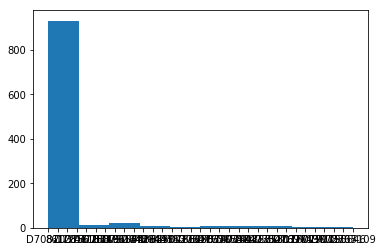

In [139]:
nodes = [two_path_mechanism(component) for i in range(1000)]
plt.hist(nodes)

In [152]:
c_agents = gen_agents_from(component, randomness_min=0, randomness_max=1)
log = []
ret = [two_path_mechanism(component, log=log, agents=c_agents) for i in range(1000)]
log = make_log_from(component, c_agents)
rwd = rewards(log)

In [153]:
stat2 = []
for i in range(10):
    stat2.append([])
    
for node in c_agents:
    category = int( c_agents[node].randomness * 10 )
    stat2[category].append( rwd[node] )

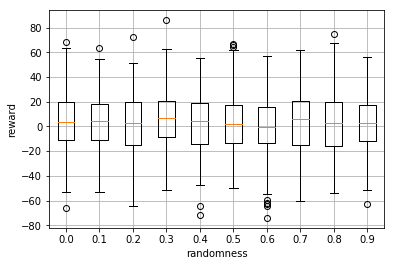

In [154]:
# 点数のタプル
# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(stat2)
ax.set_xticklabels([x/10 for x in range(10)])

plt.xlabel('randomness')
plt.ylabel('reward')
#plt.ylim([-50,20])
# Y軸のメモリのrange
plt.grid()

# 描画
plt.show()

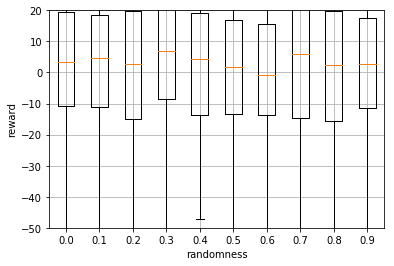

In [155]:
# 点数のタプル
# 箱ひげ図
fig, ax = plt.subplots()

bp = ax.boxplot(stat2)
ax.set_xticklabels([x/10 for x in range(10)])

plt.xlabel('randomness')
plt.ylabel('reward')
plt.ylim([-50,20])
# Y軸のメモリのrange
plt.grid()

# 描画
plt.show()

In [433]:
def simulate(graph, ylim=None):
    c_agents = gen_agents_from(graph, randomness_min=0, randomness_max=1)
    log = []
    ret = [two_path_mechanism(graph, log=log, agents=c_agents) for i in range(1000)]
    rwd = rewards(log)
    
    stat = []
    for i in range(10):
        stat.append([])

    for node in c_agents:
        category = int( c_agents[node].randomness * 10 )
        stat[category].append( rwd[node] )
        
    # 点数のタプル
    # 箱ひげ図
    fig, ax = plt.subplots()

    bp = ax.boxplot(stat)
    ax.set_xticklabels([x/10 for x in range(10)])

    plt.xlabel('randomness')
    plt.ylabel('reward')
    if ylim is not None:
        plt.ylim(ylim)
    # Y軸のメモリのrange
    plt.grid()

    # 描画
    plt.show()

In [426]:
ba100 = G

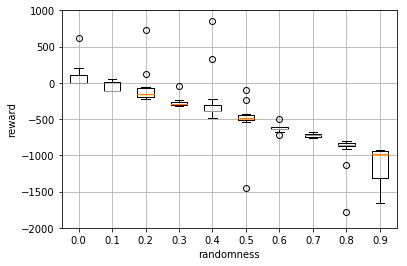

In [434]:
simulate(ba100, ylim=[-2000,1000])

In [424]:
G.nodes()

NodeView((2, 0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99))

In [15]:
G

NameError: name 'G' is not defined